Dunia Jaser 1201345

Section: 3

Instructor: Mohammad Jubran

ENCS5141, INTELLIGENT SYSTEMS LAB



---

# Case Study #1: Data Cleaning and Feature Engineering for the Titanic Dataset

---



1. Load the Titanic dataset using the code snippet provided below.

In [1]:
import seaborn as sns
import numpy as np
# load dataset titanic
df = sns.load_dataset('titanic')


2. Perform initial data exploration to understand the dataset’s structure, features, and any missing values. Summarize the dataset’s statistics and gain insights into the data.

In [2]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(df.head())
print("---------------------------------------------------------------------------")

# Get a concise summary of the dataframe, including the number of non-null values in each column
print("Summary of the dataframe (info):")
print(df.info())
print("---------------------------------------------------------------------------")

# Generate descriptive statistics to summarize the central tendency, dispersion, and shape of the dataset's distribution
print("Descriptive statistics of the dataset:")
print(df.describe())
print("---------------------------------------------------------------------------")

# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())
print("---------------------------------------------------------------------------")

First few rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
---------------------------------------------------------------------------
Summary of the dataframe (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data co

> After looking closely at the Titanic data, we learned a lot about the passengers, like their ages, whether they were male or female, the class they traveled in, and who survived. This information is like a big puzzle; some pieces are missing or don't fit right away. We saw that some details, like how old some passengers were or their cabin numbers, weren't always filled in. This is important because it tells us where we need to do a bit more work to get everything ready for further steps. By understanding these basic details, we can start fixing these gaps and make sure all the information is complete and ready to use for making predictions, such as guessing who might have survived the Titanic disaster. This first look at the data is very helpful for setting up our next steps in organizing and preparing the data better.





Total Passengers: 891
Survived: 342 (38.38%)
Did Not Survive: 549 (61.62%)


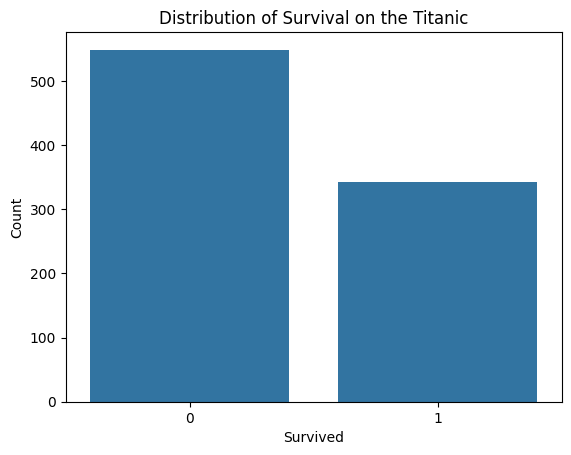

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the total number of passengers, number of survivors, and number of non-survivors
total_passengers = len(df)
survived_count = df['survived'].sum()
not_survived_count = total_passengers - survived_count

# Calculate percentages
survived_percentage = (survived_count / total_passengers) * 100
not_survived_percentage = (not_survived_count / total_passengers) * 100

# Display the percentages
print(f"Total Passengers: {total_passengers}")
print(f"Survived: {survived_count} ({survived_percentage:.2f}%)")
print(f"Did Not Survive: {not_survived_count} ({not_survived_percentage:.2f}%)")

# Plot the distribution of survivors
sns.countplot(x='survived', data=df)
plt.title('Distribution of Survival on the Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


Survival Rate by Class:
pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64
---------------------------------------------------------------------------
Survival Rate by Gender:
sex
female    74.203822
male      18.890815
Name: survived, dtype: float64
---------------------------------------------------------------------------
Survival Rate by Age Group:
age_group
(0, 18]     50.359712
(18, 40]    38.823529
(40, 60]    39.062500
(60, 80]    22.727273
Name: survived, dtype: float64
---------------------------------------------------------------------------


<ipython-input-4-f9e7faf2541e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=df, palette="Greens")


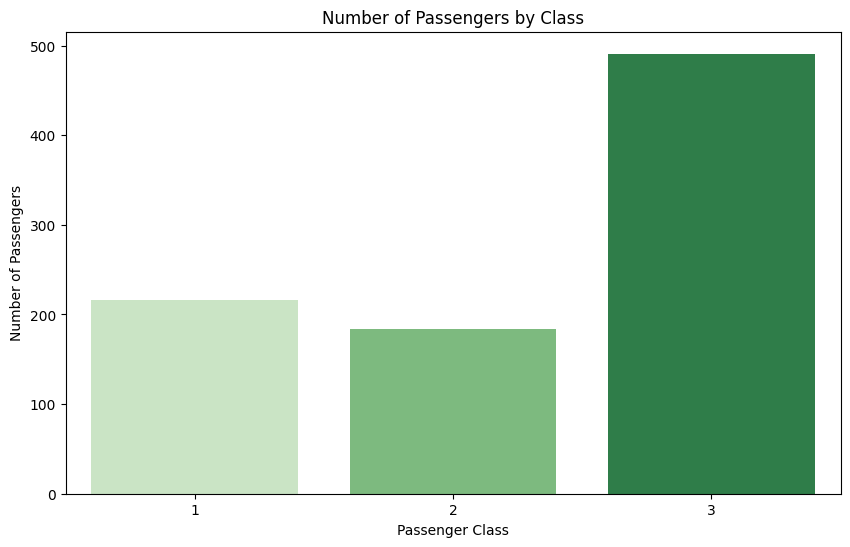

<ipython-input-4-f9e7faf2541e>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette="Greens")


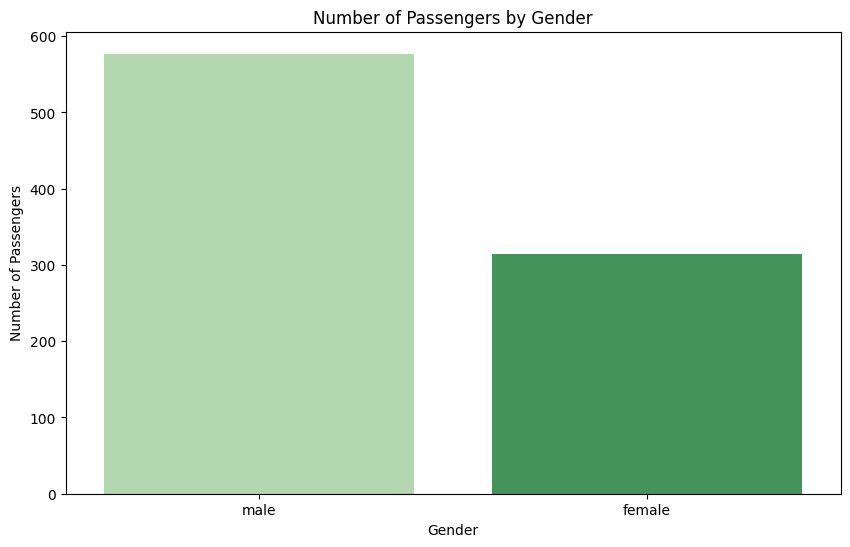

<ipython-input-4-f9e7faf2541e>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df, palette="Greens")


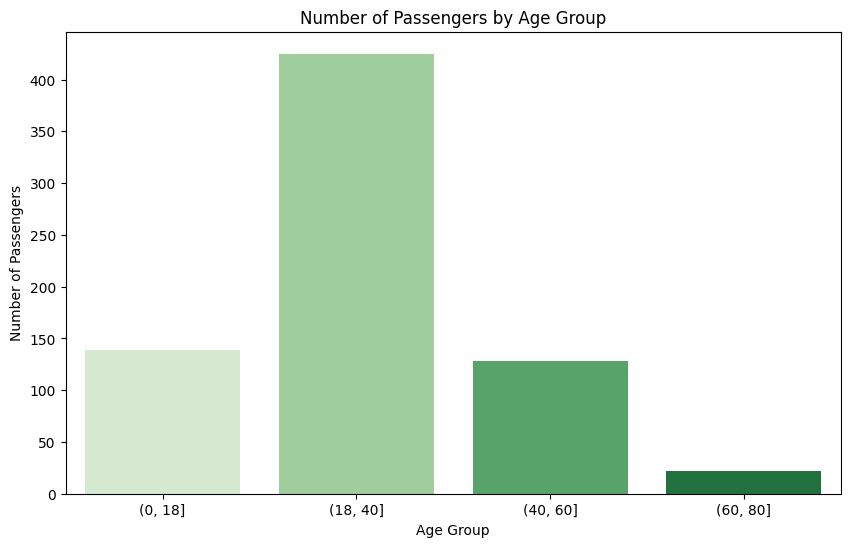

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Survival rate by class
class_survival_rate = df.groupby('pclass')['survived'].mean() * 100

# Survival rate by gender
gender_survival_rate = df.groupby('sex')['survived'].mean() * 100

# Define age bins and create an age_group column
age_bins = [0, 18, 40, 60, 80]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

# Calculate survival rate by age group
age_group_survival_rate = df.groupby('age_group')['survived'].mean() * 100

# Display the results
print("Survival Rate by Class:")
print(class_survival_rate)
print("---------------------------------------------------------------------------")
print("Survival Rate by Gender:")
print(gender_survival_rate)
print("---------------------------------------------------------------------------")
print("Survival Rate by Age Group:")
print(age_group_survival_rate)
print("---------------------------------------------------------------------------")

# Visualize the number of passengers by class
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', data=df, palette="Greens")
plt.title('Number of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

# Visualize the number of passengers by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df, palette="Greens")
plt.title('Number of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

# Visualize the number of passengers by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, palette="Greens")
plt.title('Number of Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.show()


3. Address any data quality issues, such as missing values and outliers. Decide on an appropriate strategy for handling missing data, such as imputation or removal of rows/columns.

The missing values before cleaning:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_group      177
dtype: int64
---------------------------------------------------------------------------
Age distribution for each gender:
        count       mean        std   min   25%   50%   75%   max
sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0


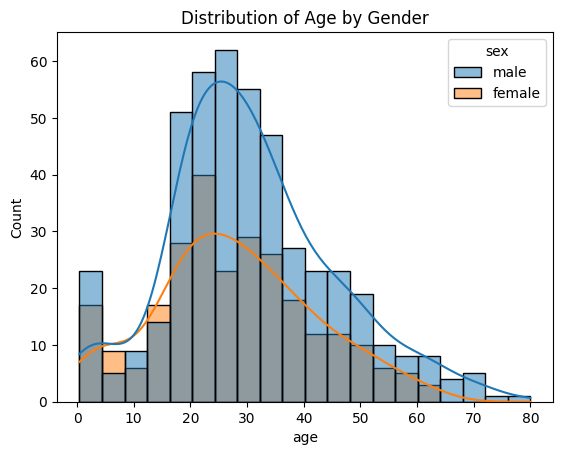

---------------------------------------------------------------------------
The median of age for each male and female:
sex
female    27.0
male      29.0
Name: age, dtype: float64
---------------------------------------------------------------------------
Number of missing age values after substitution:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
---------------------------------------------------------------------------
DataFrame before handling missing age values:
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3     

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer



print("The missing values before cleaning:")
print(df.isnull().sum())
print("---------------------------------------------------------------------------")


# Drop the 'deck' column due to a high number of missing values
df_cleaned = df.drop(columns=['deck'])
df_cleaned = df_cleaned.drop(columns=['age_group'])
age_distribution = df_cleaned.groupby('sex')['age'].describe()
print("Age distribution for each gender:")
print(age_distribution)

# Create histograms displaying the distribution of age values based on gender, and incorporate the actual distribution curve.
sns.histplot(data=df_cleaned, x="age", hue="sex", kde=True)
plt.title('Distribution of Age by Gender')
plt.show()
print("---------------------------------------------------------------------------")

# Calculate median age for each gender
median_age_by_sex = df_cleaned.groupby('sex')['age'].median()
print("The median of age for each male and female:")
print(median_age_by_sex)
print("---------------------------------------------------------------------------")

# Replace missing age values with the corresponding gender's median age
for sex, median_age in median_age_by_sex.items():
    df_cleaned.loc[(df_cleaned['sex'] == sex) & df_cleaned['age'].isnull(), 'age'] = median_age


# Impute missing values for 'embarked' and 'embark_town' with the mode value
imputer_embarked = SimpleImputer(strategy='most_frequent')
df_cleaned['embarked'] = imputer_embarked.fit_transform(df_cleaned[['embarked']])
df_cleaned['embark_town'] = imputer_embarked.fit_transform(df_cleaned[['embark_town']])

# Check if there are any missing age values remaining
missing_age_count = df_cleaned.isnull().sum()
print(f"Number of missing age values after substitution:\n{missing_age_count}")
print("---------------------------------------------------------------------------")

print("DataFrame before handling missing age values:")
print(df)
print("---------------------------------------------------------------------------")


# Display the DataFrame after handling missing values
print("DataFrame after handling missing age values:")
print(df_cleaned)
print("---------------------------------------------------------------------------")

df_cleaned1 = df_cleaned

**Detection Outliers**

 I used the interquartile range (IQR)

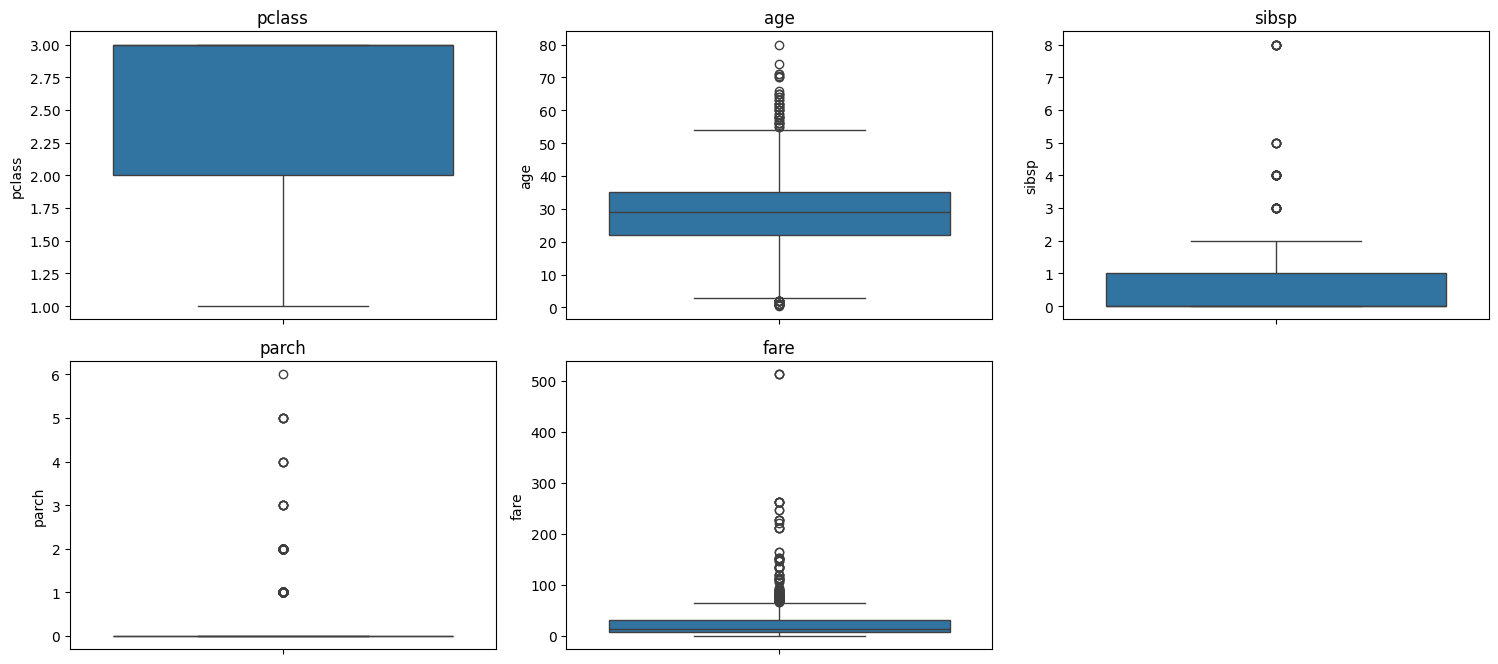

The outliers for each feature:
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
7           0       3    male   2.0      3      1  21.0750        S   Third   
11          1       1  female  58.0      0      0  26.5500        S   First   
15          1       2  female  55.0      0      0  16.0000        S  Second   
16          0       3    male   2.0      4      1  29.1250        Q   Third   
33          0       2    male  66.0      0      0  10.5000        S  Second   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
871         1       1  female  47.0      1      1  52.5542        S   First   
879         1       1  female  56.0      0      1  83.1583        C   First   
880         1       2  female  25.0      0      1  26.0000        S  Second   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
888         0       3  female  27.0      1      2  23.4500        S   Third   

       who  adult_ma

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = df_cleaned.select_dtypes(include=['number'])
numerical_features= numerical_features.drop(columns=['survived'])
numerical_features= numerical_features.columns.tolist()
# Setting up the plot size and layout
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of numerical features
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Selecting numeric columns to detect outliers
numeric_cols = ['age', 'fare', 'sibsp', 'parch']

outliers = pd.DataFrame()

for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Get the indices of outliers
    outlier_indices = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)].index
    # Safe way to assign new column value to a slice
    column_outliers = df_cleaned.loc[outlier_indices].copy()
    column_outliers['Outlier_In'] = col
    outliers = pd.concat([outliers, column_outliers], axis=0)

print("The outliers for each feature:")
print(outliers)
print("---------------------------------------------------------------------------")




**Handling Detected Outliers**

I used capping: cap the extreme values by setting a threshold beyond which values are considered as outliers. You can replace these extreme values with the threshold value itself or with the nearest non-outlying data point.

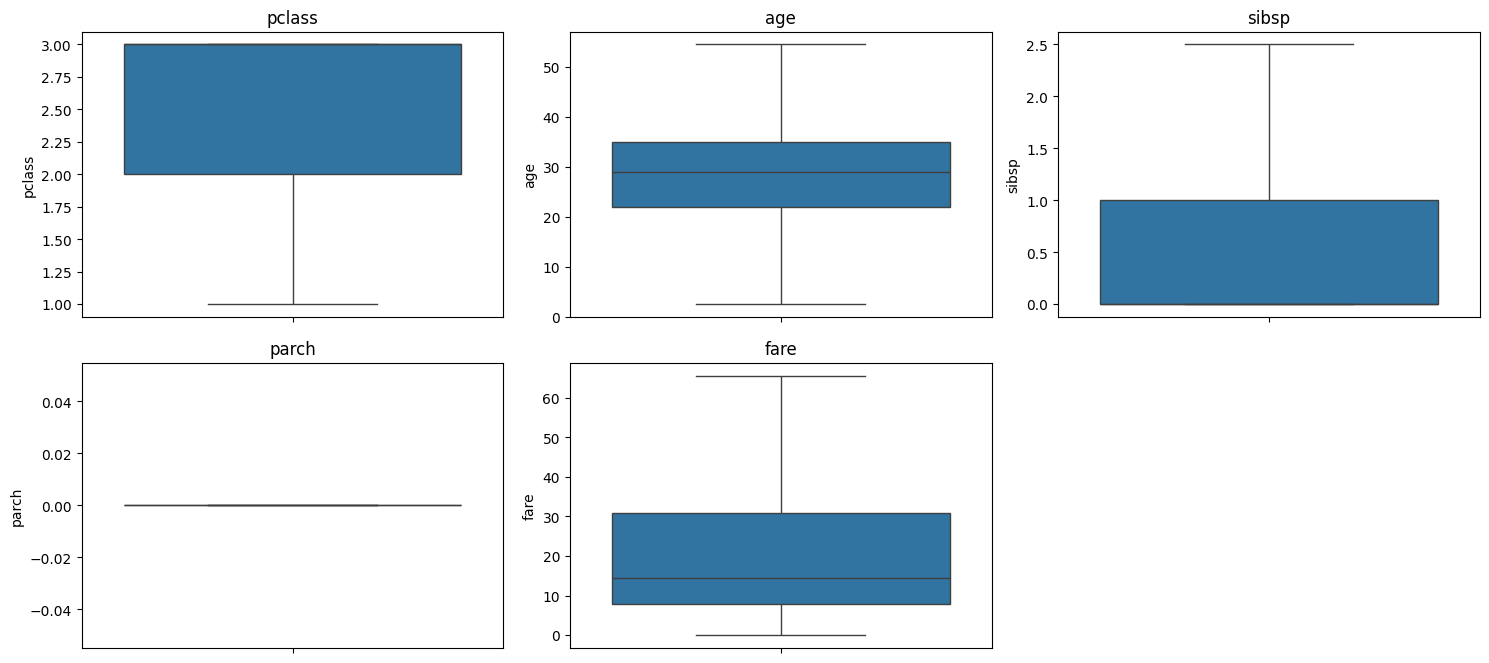

In [7]:
import numpy as np

for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])

# Replot the boxplots to verify the changes
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of numerical features
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()






4. Analyze the relevance of each feature for your machine learning task by using feature selection techniques.

**Using variance for feature selection**

In [8]:
from sklearn.feature_selection import VarianceThreshold

threshold_value = 0.7

# Initialize the VarianceThreshold selector with a threshold
selector = VarianceThreshold(threshold=threshold_value)

# Fit the selector to the data
selector.fit(df_cleaned[numeric_cols])

# Apply the selector to the data
df_high_variance = df_cleaned[numeric_cols][df_cleaned[numeric_cols].columns[selector.get_support()]]

# Variance of the data
variances = selector.variances_

# Print the variance of each feature
print(f"Variance of each feature with threshold {threshold_value}:")
for col, var in zip(df_cleaned[numeric_cols].columns, variances):
    print(f"{col}: {var}")
print("---------------------------------------------------------------------------")
# Print the high variance features
print("Features with high variance:")
print(df_high_variance.columns.tolist())
print("---------------------------------------------------------------------------")
print(f"Number of features retained: {len(df_high_variance.columns)}")
print("---------------------------------------------------------------------------")


Variance of each feature with threshold 0.7:
age: 145.59808019085986
fare: 419.0261273429305
sibsp: 0.5010492756471057
parch: 0.0
---------------------------------------------------------------------------
Features with high variance:
['age', 'fare']
---------------------------------------------------------------------------
Number of features retained: 2
---------------------------------------------------------------------------


5. If the dataset contains categorical variables, encode them into a numerical format suitable for machine learning models.

I used the LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder

df_cleaned = df_cleaned.drop(columns=['parch'])
# List of categorical columns to encode
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category','boolean']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_cols:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

# Display the first few rows of the DataFrame to verify the encoding
print(df_cleaned.head())
print("---------------------------------------------------------------------------")


   survived  pclass  sex   age  sibsp     fare  embarked  class  who  \
0         0       3    1  22.0    1.0   7.2500         2      2    1   
1         1       1    0  38.0    1.0  65.6344         0      0    2   
2         1       3    0  26.0    0.0   7.9250         2      2    2   
3         1       1    0  35.0    1.0  53.1000         2      0    2   
4         0       3    1  35.0    0.0   8.0500         2      2    1   

   adult_male  embark_town  alive  alone  
0           1            2      0      0  
1           0            0      1      0  
2           0            2      1      1  
3           0            2      1      0  
4           1            2      0      1  
---------------------------------------------------------------------------


6. Split the dataset into training and testing subsets to evaluate the performance of your machine learning models.

In [10]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('survived', axis=1)  # 'survived' is the target in the Titanic dataset
X = X.drop('alive', axis=1)
y = df_cleaned['survived']
print(X.head())
print("---------------------------------------------------------------------------")
print(y.head())
print("---------------------------------------------------------------------------")

# Split the dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")
print("---------------------------------------------------------------------------")


   pclass  sex   age  sibsp     fare  embarked  class  who  adult_male  \
0       3    1  22.0    1.0   7.2500         2      2    1           1   
1       1    0  38.0    1.0  65.6344         0      0    2           0   
2       3    0  26.0    0.0   7.9250         2      2    2           0   
3       1    0  35.0    1.0  53.1000         2      0    2           0   
4       3    1  35.0    0.0   8.0500         2      2    1           1   

   embark_town  alone  
0            2      0  
1            0      0  
2            2      1  
3            2      0  
4            2      1  
---------------------------------------------------------------------------
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64
---------------------------------------------------------------------------
Training data size: 712 samples
Testing data size: 179 samples
---------------------------------------------------------------------------


7. Scale or normalize the numerical features to ensure consistent scaling across variables.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled and X_test_scaled contain the scaled features


8. Apply suitable dimensionality reduction techniques to reduce the size of the data while preserving important information.

In [12]:
from sklearn.decomposition import PCA
import pandas as pd

feature_names = X_train.columns

# Apply PCA
pca = PCA(n_components=X_train_scaled.shape[1])
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit the PCA on the scaled training data

# Transform the scaled test data using the same PCA model
X_test_pca = pca.transform(X_test_scaled)
# Get the PCA components (loadings)
components = pca.components_

# Map the components to the original features
components_df = pd.DataFrame(components, columns=feature_names, index=[f'PC{i+1}' for i in range(components.shape[0])])

# Print the explained variance ratio for each selected component
print(f"Explained variance ratio for each PCA component are {pca.explained_variance_ratio_}")
print("---------------------------------------------------------------------------")

# Display the PCA components and their association with original features
print(components_df)
print("---------------------------------------------------------------------------")


Explained variance ratio for each PCA component are [3.02474721e-01 2.13863857e-01 1.73560648e-01 1.63542946e-01
 7.34039461e-02 2.58720871e-02 2.22838306e-02 1.95875485e-02
 5.41041588e-03 1.37494110e-31 1.50346408e-33]
---------------------------------------------------------------------------
        pclass           sex           age         sibsp          fare  \
PC1  -0.408063 -3.379570e-01  8.310558e-02  1.828597e-01  4.446922e-01   
PC2   0.344237 -3.104000e-01 -4.074416e-01  4.021118e-01 -8.336992e-02   
PC3   0.204329 -8.998346e-02 -1.523598e-01 -1.320789e-01 -1.582262e-01   
PC4  -0.086236  4.241794e-01 -2.245427e-01  3.786107e-01  2.330196e-01   
PC5  -0.246786 -1.080697e-01 -6.827451e-01 -3.542034e-01  1.959449e-02   
PC6   0.166058  1.629894e-01 -3.735458e-01  1.423443e-01  5.769061e-01   
PC7   0.120245 -1.276731e-01  3.535359e-01  3.337834e-01  3.030983e-01   
PC8  -0.250712  6.432143e-02 -1.471350e-01  6.191014e-01 -5.392549e-01   
PC9   0.002242  7.367017e-01  3.37363

9. Validate your preprocessing pipeline by training and evaluating a machine learning model, such as the Random Forest model, on the preprocessed data.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Random Forest classifier on the PCA-transformed features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")
print("---------------------------------------------------------------------------")

# Optionally, you can print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy on the test set: 0.7877094972067039
---------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



10.Compare the results to the model trained on the raw data (before feature filtering, transformation, and reduction) to ensure that preprocessing has improved model performance.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

df_raw = sns.load_dataset('titanic')

# Selecting only numeric columns for simplicity as they don't need categorical encoding
numeric_cols = ['age', 'sibsp', 'parch', 'fare']
df_raw = df_raw[numeric_cols + ['survived']].dropna()

# Splitting the data
X_raw = df_raw.drop('survived', axis=1)
y_raw = df_raw['survived']
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# Training the model on raw data
clf_raw = RandomForestClassifier(random_state=42)
clf_raw.fit(X_train_raw, y_train_raw)

# Predicting and evaluating the model
y_pred_raw = clf_raw.predict(X_test_raw)
accuracy_raw = accuracy_score(y_test_raw, y_pred_raw)
print(f"Accuracy on the raw data: {accuracy_raw}")
print("---------------------------------------------------------------------------")

print("Classification Report for raw data:")
print(classification_report(y_test_raw, y_pred_raw))

Accuracy on the raw data: 0.6573426573426573
---------------------------------------------------------------------------
Classification Report for raw data:
              precision    recall  f1-score   support

           0       0.69      0.78      0.74        87
           1       0.58      0.46      0.51        56

    accuracy                           0.66       143
   macro avg       0.64      0.62      0.62       143
weighted avg       0.65      0.66      0.65       143

